In [1]:
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

# Dataset: "tips"

**Raw Data:** https://github.com/mwaskom/seaborn-data
  
**Original Source:** https://rdrr.io/cran/reshape2/man/tips.html

In [3]:
# Import Example Data
DF, _dims = plst.load_dataset("tips", verbose=True)
DF["tip_pct"] = DF["tip"] / DF["total_bill"]

#! Imported seaborn dataset 'tips' 
	 columns:Index(['Unnamed: 0', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time',
       'size', 'size-cut'],
      dtype='object')
	 dimensions: {'y': 'tip', 'x': 'size-cut', 'hue': 'smoker', 'col': 'sex', 'row': 'time'}


In [4]:
dims = dict(
    y="tip_pct",
    x="time",
    hue="sex",
    # col="size-cut",
    # row="smoker",
    col="smoker",
)
DA1 = plst.DataAnalysis(DF, dims, verbose=True)
# DA.catplot(dodge=True)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
✅ GROUPS COMPLETE: No groups with NaNs.
🫠 GROUPS UNEQUAL: Groups (8 total) have different samplesizes (n = 30.5 ±21.9).
   👉 Call .data_get_samplesizes() to see them.
   These are the 5 groups with the largest samplesizes:
   |                             |   tip_pct |
   |:----------------------------|----------:|
   | ('No', 'Male', 'Dinner')    |        77 |
   | ('Yes', 'Male', 'Dinner')   |        47 |
   | ('No', 'Female', 'Dinner')  |        29 |
   | ('No', 'Female', 'Lunch')   |        25 |
   | ('Yes', 'Female', 'Dinner') |        23 |
🌳 LEVELS WELL CONNECTED: These Factors have levels that are always found
   together: ['smoker', 'sex', 'time'].
   👉 Call .levels_combocount() or .levels_dendrogram() to see them all.


In [5]:
DA1.check_normality()  # Most are True, so use non-parametric tests

W          pval  normal   n
smoker sex    time                                      
No     Female Dinner  0.936333  8.039642e-02    True  29
              Lunch   0.931035  9.182566e-02    True  25
       Male   Dinner  0.982490  3.693630e-01    True  77
              Lunch   0.989398  9.973328e-01    True  20
Yes    Female Dinner  0.935736  1.454729e-01    True  23
              Lunch   0.901863  2.296299e-01    True  10
       Male   Dinner  0.633948  1.393850e-09   False  47
              Lunch   0.972824  9.255351e-01    True  13

In [18]:
DA1.check_homoscedasticity()

W      pval  equal_var  group count n per group
smoker sex    time                                                          
No     Female levene  0.244854  0.622807       True            2    [29, 25]
       Male   levene  1.043743  0.309547       True            2    [77, 20]
Yes    Female levene  1.942917  0.173264       True            2    [23, 10]
       Male   levene  0.658426  0.420434       True            2    [47, 13]

In [6]:
# Unpaired, Nonparametric -> Mann-Whitney U test
DA1.test_pairwise(parametric=True)

time       A      B   mean(A)    std(A)   mean(B)  \
smoker sex    Contrast                                                          
No     -      time             -  Dinner  Lunch  0.158653  0.040458  0.160920   
              sex              -  Female   Male  0.156921  0.036421  0.160669   
       NaN    time * sex  Dinner  Female   Male  0.156774  0.040702  0.159360   
              time * sex   Lunch  Female   Male  0.157091  0.031568  0.165706   
       Female sex * time     NaN  Dinner  Lunch  0.156774  0.040702  0.157091   
       Male   sex * time     NaN  Dinner  Lunch  0.159360  0.040611  0.165706   
Yes    -      time             -  Dinner  Lunch  0.160828  0.095153  0.170404   
              sex              -  Female   Male  0.182150  0.071595  0.152771   
       NaN    time * sex  Dinner  Female   Male  0.185142  0.082098  0.148929   
              time * sex   Lunch  Female   Male  0.175270  0.040914  0.166662   
       Female sex * time     NaN  Dinner  Lunch  0.185142  0.082098  0.175270   
       Male   sex * time     NaN  Dinner  Lunch  0.148929  0.099586  0.166662   

                            std(B) Paired  Parametric         T         dof  \
smoker sex    Contrast                                                        
No     -      time        0.038989  False        True -0.323168   85.899256   
              sex         0.041849  False        True -0.574070  122.889138   
       NaN    time * sex  0.040611  False        True -0.291778   50.325900   
              time * sex  0.047097  False        True -0.701638   31.854121   
       Female sex * time  0.031568  False        True -0.032163   51.470779   
       Male   sex * time  0.047097  False        True -0.551675   26.797323   
Yes    -      time        0.042770  False        True -0.662614   82.322852   
              sex         0.090588  False        True  1.719004   79.664202   
       NaN    time * sex  0.099586  False        True  1.612962   52.156183   
              time * sex  0.045423  False        True  0.476679   20.401805   
       Female sex * time  0.040914  False        True  0.460087   30.213616   
       Male   sex * time  0.045423  False        True -0.922207   44.568451   

                         alternative     p-unc   BF10    hedges **p-unc  \
smoker sex    Contrast                                                    
No     -      time         two-sided  0.747354  0.199 -0.056355      ns   
              sex          two-sided  0.566970  0.212 -0.093215      ns   
       NaN    time * sex   two-sided  0.771655  0.236 -0.063177      ns   
              time * sex   two-sided  0.488000  0.361 -0.215944      ns   
       Female sex * time   two-sided  0.974466  0.275 -0.008490      ns   
       Male   sex * time   two-sided  0.585742  0.291 -0.149943      ns   
Yes    -      time         two-sided  0.509429  0.298 -0.111101      ns   
              sex          two-sided  0.089497  0.816  0.345227      ns   
       NaN    time * sex   two-sided  0.112788   0.77  0.379831      ns   
              time * sex   two-sided  0.638657  0.414  0.190525      ns   
       Female sex * time   two-sided  0.648748  0.383  0.132687      ns   
       Male   sex * time   two-sided  0.361386  0.429 -0.192197      ns   

                          Sign.                                pairs cross  
smoker sex    Contrast                                                      
No     -      time        False                      (Dinner, Lunch)     x  
              sex         False                       (Female, Male)     x  
       NaN    time * sex  False   ((Dinner, Male), (Dinner, Female))   hue  
              time * sex  False     ((Lunch, Male), (Lunch, Female))   hue  
       Female sex * time  False  ((Lunch, Female), (Dinner, Female))     x  
       Male   sex * time  False      ((Lunch, Male), (Dinner, Male))     x  
Yes    -      time        False                      (Dinner, Lunch)     x  
              sex         False           

Lunch_Female vs. Lunch_Male: Custom statistical test, P_val:4.880e-01
Dinner_Female vs. Dinner_Male: Custom statistical test, P_val:7.717e-01
Lunch_Male vs. Lunch_Female: Custom statistical test, P_val:6.387e-01
Dinner_Male vs. Dinner_Female: Custom statistical test, P_val:1.128e-01


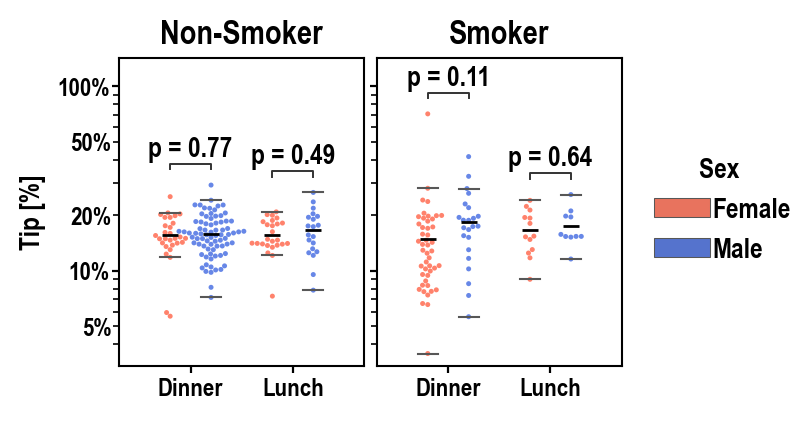

In [30]:
# Colors
plst.set_palette(["tomato", "royalblue"], verbose=False)

(
    DA1.subplots(figsize=(3, 2))
    .fillaxes(kind="swarm", dodge=True, size=1.8, zorder=2, alpha=0.8)
    .fillaxes(
        kind="box",
        whiskerprops=dict(linewidth=0),  # Remove whiskers
        boxprops=dict(linewidth=0, fill=False),  # Remove box
        medianprops=dict(linewidth=0),  # remove median
        showmeans=True,
        meanprops=dict(
            marker="_", markerfacecolor="none", markeredgecolor="black"
        ),
        showfliers=False,
    )
    .edit_y_scale_log(10)
    .edit_y_ticklabels_log_minor(subs=[0, 1, 2, 5])
    .edit_y_ticklabel_percentage()
    .annotate_pairwise(
        only_sig="all",
        text_format="simple",
        text_offset=0.5,
        verbose=True,
        include="__hue",
    )
    .edit_titles(
        axtitles=["Non-Smoker", "Smoker"],
    )
    .edit_xy_axis_labels(y="Tip [%]", x="")
    .edit_legend(capitalize_title=True)
)

plt.savefig("tips1.png", dpi=300, bbox_inches="tight")